# Part I: Research

## A. Describe one question or decision that you will address using the data set you chose. 
The summarized question or decision must be relevant to a realistic organizational need or situation.

### The Summarized Question (hypothesis test)
What customer factors might influence churn?

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
# convert clv to dataframe
df = pd.read_csv("churn_data/churn_raw_data.csv")

## B. Describe the variables in the data set and indicate the specific type of data being described. 
Use examples from the data set that support you claims.

### The Variables
The variables in this data set describe the customer information for a subscription based service including demographics, spending information, and whether the customer has churned or not. See Out[3] for a list of data types: int64, float64, and objects. See the first 5 rows of Out[4] and Out[5] for a more detailed view of the data.

In [3]:
# display the first 5 columns and their data to get an idea of what
# kind of data we have
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df.dtypes

Unnamed: 0                int64
CaseOrder                 int64
Customer_id              object
Interaction              object
City                     object
State                    object
County                   object
Zip                       int64
Lat                     float64
Lng                     float64
Population                int64
Area                     object
Timezone                 object
Job                      object
Children                float64
Age                     float64
Education                object
Employment               object
Income                  float64
Marital                  object
Gender                   object
Churn                    object
Outage_sec_perweek      float64
Email                     int64
Contacts                  int64
Yearly_equip_failure      int64
Techie                   object
Contract                 object
Port_modem               object
Tablet                   object
InternetService          object
Phone   

In [4]:
df.head(5)

,Unnamed: 0,CaseOrder,Customer_id,Interaction,City,State,County,Zip,Lat,Lng,Population,Area,Timezone,Job,Children,Age,Education,Employment,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,item1,item2,item3,item4,item5,item6,item7,item8
0,1,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,Urban,America/Sitka,Environmental health practitioner,NaN,68.0,Master's Degree,Part Time,28561.99,Widowed,Male,No,6.972566,10,0,1,No,One year,Yes,Yes,Fiber Optic,Yes,No,Yes,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.795513,171.449762,904.536110,5,5,5,3,4,4,3,4
1,2,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,Urban,America/Detroit,"Programmer, multimedia",1.0,27.0,Regular High School Diploma,Retired,21704.77,Married,Female,Yes,12.014541,12,0,1,Yes,Month-to-month,No,Yes,Fiber Optic,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Bank Transfer(automatic),1.156681,242.948015,800.982766,3,4,3,3,4,3,4,4
2,3,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,Urban,America/Los_Angeles,Chief Financial Officer,4.0,50.0,Regular High School Diploma,Student,NaN,Widowed,Female,No,10.245616,9,0,1,Yes,Two Year,Yes,No,DSL,Yes,Yes,No,No,No,No,No,Yes,Yes,Credit Card (automatic),15.754144,159.440398,2054.706961,4,4,2,4,4,3,3,3
3,4,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863,Suburban,America/Los_Angeles,Solicitor,1.0,48.0,Doctorate Degree,Retired,18925.23,Married,Male,No,15.206193,15,2,0,Yes,Two Year,No,No,DSL,Yes,No,Yes,No,No,No,Yes,No,Yes,Mailed Check,17.087227,120.249493,2164.579412,4,4,4,2,5,4,3,3
4,5,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352,Suburban,America/Chicago,Medical illustrator,0.0,83.0,Master's Degree,Student,40074.19,Separated,Male,Yes,8.960316,16,2,1,No,Month-to-month,Yes,No,Fiber Optic,No,No,No,No,No,Yes,Yes,No,No,Mailed Check,1.670972,150.761216,271.493436,4,4,4,3,4,4,4,5


In [5]:
# display data types of each column
df.describe()

,Unnamed: 0,CaseOrder,Zip,Lat,Lng,Population,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year,item1,item2,item3,item4,item5,item6,item7,item8
count,10000.00000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,7505.000000,7525.000000,7510.000000,10000.000000,10000.000000,10000.000000,10000.000000,9069.000000,10000.000000,8979.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,5000.50000,49153.319600,38.757567,-90.782536,9756.562400,2.095936,53.275748,39936.762226,11.452955,12.016000,0.994200,0.398000,34.498858,174.076305,3398.842752,3.490800,3.505100,3.487000,3.497500,3.492900,3.497300,3.509500,3.495600
std,2886.89568,2886.89568,27532.196108,5.437389,15.156142,14432.698671,2.154758,20.753928,28358.469482,7.025921,3.025898,0.988466,0.635953,26.438904,43.335473,2187.396807,1.037797,1.034641,1.027977,1.025816,1.024819,1.033586,1.028502,1.028633
min,1.00000,1.00000,601.000000,17.966120,-171.688150,0.000000,0.000000,18.000000,740.660000,-1.348571,1.000000,0.000000,0.000000,1.000259,77.505230,155.506715,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2500.75000,2500.75000,26292.500000,35.341828,-97.082813,738.000000,0.000000,35.000000,19285.522500,8.054362,10.000000,0.000000,0.000000,7.890442,141.071078,1234.110529,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,5000.50000,5000.50000,48869.500000,39.395800,-87.918800,2910.500000,1.000000,53.000000,33186.785000,10.202896,12.000000,1.000000,0.000000,36.196030,169.915400,3382.424000,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000
75%,7500.25000,7500.25000,71866.500000,42.106908,-80.088745,13168.000000,3.000000,71.000000,53472.395000,12.487644,14.000000,2.000000,1.000000,61.426670,203.777441,5587.096500,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,10000.00000,10000.00000,99929.000000,70.640660,-65.667850,111850.000000,10.000000,89.000000,258900.700000,47.049280,23.000000,7.000000,6.000000,71.999280,315.878600,7158.982000,7.000000,7.000000,8.000000,7.000000,7.000000,8.000000,7.000000,8.000000


# Part II: Data-Cleaning Plan

## C. Explain the plan for cleaning the data by doing the following:

1.  Propose a plan that includes the relevant techniques and specific steps needed to identify anomalies in the data set.

This list includes the data fields that will be used to determine why a customer may or may not churn. Exclusion reasons are based on  data fields associated with: demographics (Demographics, Gender, Age), income and potential spending habits (Income, Number of Children, Education, Employment), and Internet options (Internet Service Type, StreamingServices, Bandwidth Usage)<br/>
    - Demographics\
    - Gender\
    - Age\
    - Income\
    - Number of children\
    - Education\
    - Employment\
    - InternetService type\
    - StreamingServices\
    - Bandwidth usage
    
The plan to identify anomalies in the data set is to run the following phases:\ (Larose, C. D., & Larose, D. T. (2019))<br/>
    A. Add an index field - the index field was added as a column to the dataframe.\
    B. Change misleading field values - all misleading field values were either updated or removed from the dataframe.\
    C. Drop unnecessary columns - unnecessary columns included identifier field and columns that did not influence churn.\
    D. Reexpress categorical data as numeric data - all categorical data was reexpressed in new columns as numeric data.\
    E. Standardize the numeric fields - all numeric fields were standardized.\
    F. Identify Outliers - outliers were identified and left present in the data because it is unknown how the stakeholder would want to handle the outliers.

2. Justify your approach for assessing the quality of the data, include:

    •  characteristics of the data being assessed,

    •  the approach used to assess the quality.

3.  Justify your selected programming language and any libraries and packages that will support the data-cleaning process.
I have selected to use Python as my programming language because I have more experience with Python from my BSCS degree. I have chosen to use the following libraries and packages (reasons included in the list):
- numpy for scientific computing
- pandas for it's ease of use in data analysis and manipulation
- matplotlib for data visualizations
- seaborn for data visualizations
- sklearn for splitting the data into train and test sets

4.  Provide the code you will use to identify the anomalies in the data. (this Jupyter Notebook)

### A. Add an index field
Add an index field to every row of the data from a string of numbers using the pandas package Series command with a nested range command. Check that the index is present on the data field by reading the data's head.

In [6]:
df['index'] = pd.Series(range(0,10000))
df.head(5)

,Unnamed: 0,CaseOrder,Customer_id,Interaction,City,State,County,Zip,Lat,Lng,Population,Area,Timezone,Job,Children,Age,Education,Employment,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,item1,item2,item3,item4,item5,item6,item7,item8,index
0,1,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,Urban,America/Sitka,Environmental health practitioner,NaN,68.0,Master's Degree,Part Time,28561.99,Widowed,Male,No,6.972566,10,0,1,No,One year,Yes,Yes,Fiber Optic,Yes,No,Yes,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.795513,171.449762,904.536110,5,5,5,3,4,4,3,4,0
1,2,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,Urban,America/Detroit,"Programmer, multimedia",1.0,27.0,Regular High School Diploma,Retired,21704.77,Married,Female,Yes,12.014541,12,0,1,Yes,Month-to-month,No,Yes,Fiber Optic,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Bank Transfer(automatic),1.156681,242.948015,800.982766,3,4,3,3,4,3,4,4,1
2,3,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,Urban,America/Los_Angeles,Chief Financial Officer,4.0,50.0,Regular High School Diploma,Student,NaN,Widowed,Female,No,10.245616,9,0,1,Yes,Two Year,Yes,No,DSL,Yes,Yes,No,No,No,No,No,Yes,Yes,Credit Card (automatic),15.754144,159.440398,2054.706961,4,4,2,4,4,3,3,3,2
3,4,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863,Suburban,America/Los_Angeles,Solicitor,1.0,48.0,Doctorate Degree,Retired,18925.23,Married,Male,No,15.206193,15,2,0,Yes,Two Year,No,No,DSL,Yes,No,Yes,No,No,No,Yes,No,Yes,Mailed Check,17.087227,120.249493,2164.579412,4,4,4,2,5,4,3,3,3
4,5,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352,Suburban,America/Chicago,Medical illustrator,0.0,83.0,Master's Degree,Student,40074.19,Separated,Male,Yes,8.960316,16,2,1,No,Month-to-month,Yes,No,Fiber Optic,No,No,No,No,No,Yes,Yes,No,No,Mailed Check,1.670972,150.761216,271.493436,4,4,4,3,4,4,4,5,4


### B. Change misleading field values
**Interaction** is an ID assigned to the interaction. This is misleading because the column name does not include ID in it's name. I will update the column name to Interaction_Id.

Marital -> Marital Status
Email -> Email Count
Contacts -> Contacted_Count

**Multiple** is a field that is ambiguous. I will exclude this field from the data.

**item1, item2, item3, item4, item5, item6, item7, and item8** are all fields that are also ambiguous. I will exclude these from the data.

In [7]:
df = df.rename(columns={"Interaction": "Interaction_id", "Marital":"Marital_Status", "Email": "Email_Count", "Contacts": "Contacted_Count"})
df = df.drop(columns=['Multiple', 'item1', 'item2', 'item3', 'item4', 'item5', 'item6', 'item7', 'item8'])
df.head(1)

,Unnamed: 0,CaseOrder,Customer_id,Interaction_id,City,State,County,Zip,Lat,Lng,Population,Area,Timezone,Job,Children,Age,Education,Employment,Income,Marital_Status,Gender,Churn,Outage_sec_perweek,Email_Count,Contacted_Count,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,index
0,1,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,Point Baker,AK,Prince of Wales-Hyder,99927,56.251,-133.37571,38,Urban,America/Sitka,Environmental health practitioner,NaN,68.0,Master's Degree,Part Time,28561.99,Widowed,Male,No,6.972566,10,0,1,No,One year,Yes,Yes,Fiber Optic,Yes,Yes,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.795513,171.449762,904.53611,0


### C. Drop uneccessary columns
Drop the first 4 columns: Unnamed, CaseOrder, Customer_id, Interaction_id because they hold no relevance to whether a customer has churned  or not. Also drop Lat and Lng as we are using City and State for this purpose. 

In [8]:
# Check for missing data
df.isnull().values.any()

True

isNull() returned true so there is missing data. A check for a percentage of missing values will be checked to help decide how to handle the missing data. 

In [9]:
print('Missing values Percentage: \n\n', round(df.isnull().sum().sort_values(ascending=False)/len(df)*100,1))

Missing values Percentage: 

 Children                25.0
Income                  24.9
Techie                  24.8
Age                     24.8
Phone                   10.3
Bandwidth_GB_Year       10.2
TechSupport              9.9
Tenure                   9.3
Population               0.0
Education                0.0
Job                      0.0
Timezone                 0.0
Area                     0.0
index                    0.0
Lng                      0.0
Lat                      0.0
Zip                      0.0
County                   0.0
State                    0.0
City                     0.0
Interaction_id           0.0
Customer_id              0.0
CaseOrder                0.0
Employment               0.0
Churn                    0.0
Marital_Status           0.0
OnlineSecurity           0.0
MonthlyCharge            0.0
PaymentMethod            0.0
PaperlessBilling         0.0
StreamingMovies          0.0
StreamingTV              0.0
DeviceProtection         0.0
OnlineBackup 

In [10]:
# Remove Identifiers
df = df.drop(columns=['Unnamed: 0', 'CaseOrder', 'Customer_id', 'Interaction_id', 'Lat', 'Lng'])
df.head(1)

,City,State,County,Zip,Population,Area,Timezone,Job,Children,Age,Education,Employment,Income,Marital_Status,Gender,Churn,Outage_sec_perweek,Email_Count,Contacted_Count,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,index
0,Point Baker,AK,Prince of Wales-Hyder,99927,38,Urban,America/Sitka,Environmental health practitioner,NaN,68.0,Master's Degree,Part Time,28561.99,Widowed,Male,No,6.972566,10,0,1,No,One year,Yes,Yes,Fiber Optic,Yes,Yes,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.795513,171.449762,904.53611,0


###  D. Reexpress categorical data as numeric data 
This is a step where it is left up to the judgment of the data scientist to weight the values in a way that the difference in various categories is preserved. Research should be done on how to weight your categories appropriately.

Unknown values will be reexpressed as missing. 

All fields with strings as input will be recategorized as numeric values.

First we must look at all the unique values in a field and then consider how to add numerical values to each unique value.

In [11]:
# Reexpress Yes and No as numeric data where Yes equals 1 and No equals 0
mapping = {"Yes": 1, "No": 0}
df.replace(mapping, inplace=True)
df.head()

,City,State,County,Zip,Population,Area,Timezone,Job,Children,Age,Education,Employment,Income,Marital_Status,Gender,Churn,Outage_sec_perweek,Email_Count,Contacted_Count,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,index
0,Point Baker,AK,Prince of Wales-Hyder,99927,38,Urban,America/Sitka,Environmental health practitioner,NaN,68.0,Master's Degree,Part Time,28561.99,Widowed,Male,0,6.972566,10,0,1,0.0,One year,1,1,Fiber Optic,1.0,1,1,0,0.0,0,1,1,Credit Card (automatic),6.795513,171.449762,904.536110,0
1,West Branch,MI,Ogemaw,48661,10446,Urban,America/Detroit,"Programmer, multimedia",1.0,27.0,Regular High School Diploma,Retired,21704.77,Married,Female,1,12.014541,12,0,1,1.0,Month-to-month,0,1,Fiber Optic,1.0,1,0,0,0.0,1,1,1,Bank Transfer(automatic),1.156681,242.948015,800.982766,1
2,Yamhill,OR,Yamhill,97148,3735,Urban,America/Los_Angeles,Chief Financial Officer,4.0,50.0,Regular High School Diploma,Student,NaN,Widowed,Female,0,10.245616,9,0,1,1.0,Two Year,1,0,DSL,1.0,0,0,0,0.0,0,1,1,Credit Card (automatic),15.754144,159.440398,2054.706961,2
3,Del Mar,CA,San Diego,92014,13863,Suburban,America/Los_Angeles,Solicitor,1.0,48.0,Doctorate Degree,Retired,18925.23,Married,Male,0,15.206193,15,2,0,1.0,Two Year,0,0,DSL,1.0,1,0,0,0.0,1,0,1,Mailed Check,17.087227,120.249493,2164.579412,3
4,Needville,TX,Fort Bend,77461,11352,Suburban,America/Chicago,Medical illustrator,0.0,83.0,Master's Degree,Student,40074.19,Separated,Male,1,8.960316,16,2,1,0.0,Month-to-month,1,0,Fiber Optic,0.0,0,0,0,1.0,1,0,0,Mailed Check,1.670972,150.761216,271.493436,4


In [12]:
# Impute missing fields for variables Children, Age, Income, Tenure and Bandwidth_GB_Year with median
df['Children'] = df['Children'].fillna(df['Children'].median())
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Income'] = df['Income'].fillna(df['Income'].median())
df['Tenure'] = df['Tenure'].fillna(df['Tenure'].median())
df['Bandwidth_GB_Year'] = df['Bandwidth_GB_Year'].fillna(df['Bandwidth_GB_Year'].median())
df['Techie'] = df['Techie'].fillna(df['Techie'].median())
df['Phone'] = df['Phone'].fillna(df['Phone'].median())
df['TechSupport'] = df['TechSupport'].fillna(df['Phone'].median())
# Check for missing data
df.isnull().values.any()

False

In [13]:
# City, State, County, and Timezone can be categorized with the zipcode - which is numeric. I will drop the City, State, and County columns for this reason
df.drop(columns=['City', 'State', 'County', 'Timezone'], inplace=True)
df.head(1)

,Zip,Population,Area,Job,Children,Age,Education,Employment,Income,Marital_Status,Gender,Churn,Outage_sec_perweek,Email_Count,Contacted_Count,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,index
0,99927,38,Urban,Environmental health practitioner,1.0,68.0,Master's Degree,Part Time,28561.99,Widowed,Male,0,6.972566,10,0,1,0.0,One year,1,1,Fiber Optic,1.0,1,1,0,0.0,0,1,1,Credit Card (automatic),6.795513,171.449762,904.53611,0


In [14]:
# Look at the Area unique types
# Resource: https://pandas.pydata.org/docs/reference/api/pandas.unique.html
pd.Series(df["Area"]).unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

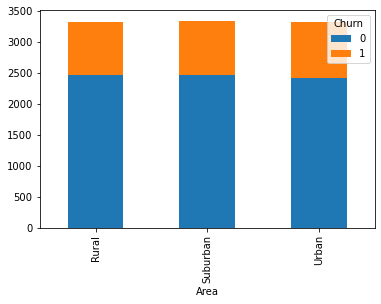

In [15]:
# It is hard to determine a weight for Area - let's see if it influences churn before deciding to include or exclude this column
# Does the Area the customer live in influence churn? No because the bar graphs clearly shows they are all about equal.
area_crosstab = pd.crosstab(df["Area"], df["Churn"])
area_crosstab.plot(kind='bar', stacked = True)
crosstab_norm = area_crosstab.div(area_crosstab.sum(1), axis=0)

Since the Areas clearly are the same percentages I will drop this column from the data set.

In [16]:
df.drop(columns=["Area"], inplace=True)
df.head()

,Zip,Population,Job,Children,Age,Education,Employment,Income,Marital_Status,Gender,Churn,Outage_sec_perweek,Email_Count,Contacted_Count,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,index
0,99927,38,Environmental health practitioner,1.0,68.0,Master's Degree,Part Time,28561.990,Widowed,Male,0,6.972566,10,0,1,0.0,One year,1,1,Fiber Optic,1.0,1,1,0,0.0,0,1,1,Credit Card (automatic),6.795513,171.449762,904.536110,0
1,48661,10446,"Programmer, multimedia",1.0,27.0,Regular High School Diploma,Retired,21704.770,Married,Female,1,12.014541,12,0,1,1.0,Month-to-month,0,1,Fiber Optic,1.0,1,0,0,0.0,1,1,1,Bank Transfer(automatic),1.156681,242.948015,800.982766,1
2,97148,3735,Chief Financial Officer,4.0,50.0,Regular High School Diploma,Student,33186.785,Widowed,Female,0,10.245616,9,0,1,1.0,Two Year,1,0,DSL,1.0,0,0,0,0.0,0,1,1,Credit Card (automatic),15.754144,159.440398,2054.706961,2
3,92014,13863,Solicitor,1.0,48.0,Doctorate Degree,Retired,18925.230,Married,Male,0,15.206193,15,2,0,1.0,Two Year,0,0,DSL,1.0,1,0,0,0.0,1,0,1,Mailed Check,17.087227,120.249493,2164.579412,3
4,77461,11352,Medical illustrator,0.0,83.0,Master's Degree,Student,40074.190,Separated,Male,1,8.960316,16,2,1,0.0,Month-to-month,1,0,Fiber Optic,0.0,0,0,0,1.0,1,0,0,Mailed Check,1.670972,150.761216,271.493436,4


In [17]:
# Let's take a look at the Job field -- doing the same steps as for Area.
pd.Series(df["Job"]).unique()

array(['Environmental health practitioner', 'Programmer, multimedia',
       'Chief Financial Officer', 'Solicitor', 'Medical illustrator',
       'Chief Technology Officer', 'Surveyor, hydrographic',
       'Sales promotion account executive',
       'Teaching laboratory technician', 'Museum education officer',
       'Teacher, special educational needs', 'Maintenance engineer',
       'Engineer, broadcasting (operations)', 'Learning disability nurse',
       'Automotive engineer', 'Amenity horticulturist',
       'Applications developer', 'Immunologist', 'Engineer, electrical',
       'Broadcast presenter', 'Counsellor', 'Geophysical data processor',
       'Designer, multimedia', 'Event organiser',
       'Equality and diversity officer', 'Psychiatrist',
       'Surveyor, commercial/residential', 'Civil Service administrator',
       'Radiographer, diagnostic', 'Air traffic controller', 'Dietitian',
       'Therapist, occupational', 'Building services engineer',
       'Information 

There are clearly a lot of different job types. I think it is justifiable to use Income as a numeric indicator for Job. I will drop the Job column for this reason.

In [18]:
df.drop(columns=['Job'], inplace=True)
df.head()

,Zip,Population,Children,Age,Education,Employment,Income,Marital_Status,Gender,Churn,Outage_sec_perweek,Email_Count,Contacted_Count,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,index
0,99927,38,1.0,68.0,Master's Degree,Part Time,28561.990,Widowed,Male,0,6.972566,10,0,1,0.0,One year,1,1,Fiber Optic,1.0,1,1,0,0.0,0,1,1,Credit Card (automatic),6.795513,171.449762,904.536110,0
1,48661,10446,1.0,27.0,Regular High School Diploma,Retired,21704.770,Married,Female,1,12.014541,12,0,1,1.0,Month-to-month,0,1,Fiber Optic,1.0,1,0,0,0.0,1,1,1,Bank Transfer(automatic),1.156681,242.948015,800.982766,1
2,97148,3735,4.0,50.0,Regular High School Diploma,Student,33186.785,Widowed,Female,0,10.245616,9,0,1,1.0,Two Year,1,0,DSL,1.0,0,0,0,0.0,0,1,1,Credit Card (automatic),15.754144,159.440398,2054.706961,2
3,92014,13863,1.0,48.0,Doctorate Degree,Retired,18925.230,Married,Male,0,15.206193,15,2,0,1.0,Two Year,0,0,DSL,1.0,1,0,0,0.0,1,0,1,Mailed Check,17.087227,120.249493,2164.579412,3
4,77461,11352,0.0,83.0,Master's Degree,Student,40074.190,Separated,Male,1,8.960316,16,2,1,0.0,Month-to-month,1,0,Fiber Optic,0.0,0,0,0,1.0,1,0,0,Mailed Check,1.670972,150.761216,271.493436,4


I also think we can drop the Education and Employment fields and supplement with income. I will plot them on a bar chart just to be sure I am not making a bad assumption.

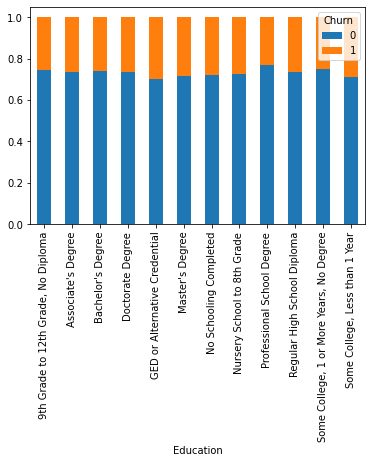

In [19]:
area_crosstab = pd.crosstab(df["Education"], df["Churn"], normalize='index')
area_crosstab.plot(kind='bar', stacked = True)
crosstab_norm = area_crosstab.div(area_crosstab.sum(1), axis=0)

Education can be numerically reexpressed using the number of years the customer stayed in school. This value is based on *In-Vet, Preventing initial and fostering initial inclusion*, http://invet-project.eu/wp-content/uploads/2014/06/National-Report_Portugal_Final.pdf. The groups Some College, Less than 1 Year, Regular High School Diploma, and GED or Alternative Credential will all have a numerical value of 12 since the expected years to finish is the 12 years for all groups.  

In [20]:
dict_edu = {"Education_Numeric": {"Regular High School Diploma": 12, "9th Grade to 12th Grade, No Diploma": 9, "No Schooling Completed": 0, "Associate's Degree": 14, "Bachelor's Degree": 16, "Doctorate Degree": 26, "GED or Alternative Credential": 12, "Master's Degree": 18, "Nursery School to 8th Grade": 8, "Professional School Degree": 14, "Some College, 1 or More Years, No Degree": 13, "Some College, Less than 1 Year": 12}}
df["Education_Numeric"] = df["Education"]
df.replace(dict_edu, inplace=True)
df.head(100)

,Zip,Population,Children,Age,Education,Employment,Income,Marital_Status,Gender,Churn,Outage_sec_perweek,Email_Count,Contacted_Count,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,index,Education_Numeric
0,99927,38,1.0,68.0,Master's Degree,Part Time,28561.990,Widowed,Male,0,6.972566,10,0,1,0.0,One year,1,1,Fiber Optic,1.0,1,1,0,0.0,0,1,1,Credit Card (automatic),6.795513,171.449762,904.536110,0,18
1,48661,10446,1.0,27.0,Regular High School Diploma,Retired,21704.770,Married,Female,1,12.014541,12,0,1,1.0,Month-to-month,0,1,Fiber Optic,1.0,1,0,0,0.0,1,1,1,Bank Transfer(automatic),1.156681,242.948015,800.982766,1,12
2,97148,3735,4.0,50.0,Regular High School Diploma,Student,33186.785,Widowed,Female,0,10.245616,9,0,1,1.0,Two Year,1,0,DSL,1.0,0,0,0,0.0,0,1,1,Credit Card (automatic),15.754144,159.440398,2054.706961,2,12
3,92014,13863,1.0,48.0,Doctorate Degree,Retired,18925.230,Married,Male,0,15.206193,15,2,0,1.0,Two Year,0,0,DSL,1.0,1,0,0,0.0,1,0,1,Mailed Check,17.087227,120.249493,2164.579412,3,26
4,77461,11352,0.0,83.0,Master's Degree,Student,40074.190,Separated,Male,1,8.960316,16,2,1,0.0,Month-to-month,1,0,Fiber Optic,0.0,0,0,0,1.0,1,0,0,Mailed Check,1.670972,150.761216,271.493436,4,18
5,31030,17701,3.0,83.0,No Schooling Completed,Full Time,33186.785,Never Married,Female,0,7.814859,15,3,1,0.0,One year,1,0,None,1.0,1,1,1,0.0,0,1,0,Electronic Check,7.000994,184.401558,1039.357983,5,0
6,37847,2535,0.0,53.0,Associate's Degree,Full Time,11467.500,Widowed,Male,1,11.129094,10,0,1,1.0,Month-to-month,0,0,DSL,1.0,0,0,0,1.0,1,1,0,Electronic Check,13.236774,200.064886,1907.242972,6,14
7,73109,23144,2.0,53.0,Bachelor's Degree,Full Time,26759.640,Married,Female,1,7.594838,16,0,0,1.0,Month-to-month,0,0,DSL,0.0,0,1,0,0.0,0,0,1,Mailed Check,36.196030,114.754111,979.612708,7,16
8,34771,17351,2.0,49.0,"Some College, Less than 1 Year",Full Time,58634.510,Separated,Prefer not to answer,0,6.637259,20,2,3,0.0,Month-to-month,1,0,DSL,1.0,1,1,0,0.0,0,0,1,Bank Transfer(automatic),8.220686,118.366844,1312.874964,8,12
9,45237,20193,1.0,86.0,GED or Alternative Credential,Full Time,50231.400,Married,Female,0,9.230409,18,1,0,0.0,Two Year,1,0,Fiber Optic,1.0,1,0,1,1.0,0,1,1,Mailed Check,3.422086,163.005280,508.763791,9,12


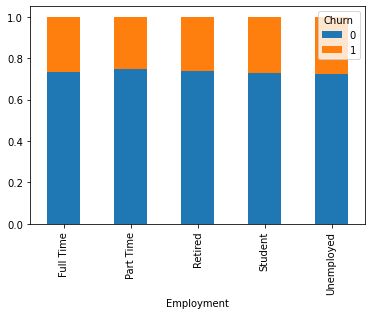

In [21]:
area_crosstab = pd.crosstab(df["Employment"], df["Churn"], normalize='index')
area_crosstab.plot(kind='bar', stacked = True)
crosstab_norm = area_crosstab.div(area_crosstab.sum(1), axis=0)

After viewing the bar chart, the Education field holds no weight in whether a customer churns or not. I am dropping this field for this reason.

In [22]:
df = df.drop(columns=['Employment'])
df.head(1)

,Zip,Population,Children,Age,Education,Income,Marital_Status,Gender,Churn,Outage_sec_perweek,Email_Count,Contacted_Count,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,index,Education_Numeric
0,99927,38,1.0,68.0,Master's Degree,28561.99,Widowed,Male,0,6.972566,10,0,1,0.0,One year,1,1,Fiber Optic,1.0,1,1,0,0.0,0,1,1,Credit Card (automatic),6.795513,171.449762,904.53611,0,18


In [23]:
# This is commente
# area_crosstab = pd.crosstab(df["Income"], df["Churn"], normalize='index')
# area_crosstab.plot(kind='bar', stacked = True)
# crosstab_norm = area_crosstab.div(area_crosstab.sum(1), axis=0)

This bar chart is hard to decipher. I think it would be best to categorize the income data into Low Income, Middle Income, and Upper Income with a reexpression into numerical data where Low Income is 1, Middle Income is 2, and Upper Income is 3. This will weight the classes appropriately.

In [24]:
# Resource for income ranges: https://money.usnews.com/money/personal-finance/family-finance/articles/where-do-i-fall-in-the-american-economic-class-system
# Low Income < 41000
# Middle Income  = 41001 - 120400
# Upper Income > 120400

df = df.dropna(subset=['Income'])
df.count()

Zip                     10000
Population              10000
Children                10000
Age                     10000
Education               10000
Income                  10000
Marital_Status          10000
Gender                  10000
Churn                   10000
Outage_sec_perweek      10000
Email_Count             10000
Contacted_Count         10000
Yearly_equip_failure    10000
Techie                  10000
Contract                10000
Port_modem              10000
Tablet                  10000
InternetService         10000
Phone                   10000
OnlineSecurity          10000
OnlineBackup            10000
DeviceProtection        10000
TechSupport             10000
StreamingTV             10000
StreamingMovies         10000
PaperlessBilling        10000
PaymentMethod           10000
Tenure                  10000
MonthlyCharge           10000
Bandwidth_GB_Year       10000
index                   10000
Education_Numeric       10000
dtype: int64

I was getting a type error for 'str' when the NaN was present on the date frame so I dropped those rows. We lose about 25% of our data this way but because Income is accounting for several fields I think it is acceptable to drop the rows where the income is not accounted for. 

In [25]:
# Group into bins of 1,2,3 by income range
df['Income_Numeric'] = df["Income"].where(df["Income"] >= 41000.00, 1)
df["Income_Numeric"].where(df["Income_Numeric"] < 120400.00, 3, inplace=True)
df["Income_Numeric"].where(df["Income_Numeric"] < 4, 2, inplace=True)

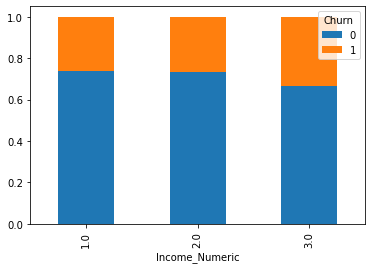

In [26]:
area_crosstab = pd.crosstab(df["Income_Numeric"], df["Churn"], normalize='index')
area_crosstab.plot(kind='bar', stacked = True)
crosstab_norm = area_crosstab.div(area_crosstab.sum(1), axis=0)

So it seems customers with a higher income churn at a higher rate than those are Middle and Lower income households. We will keep this column for sure. We will use the Income field not the Income_Numeric field for our algorithms though.

Let's look at number of children next. 


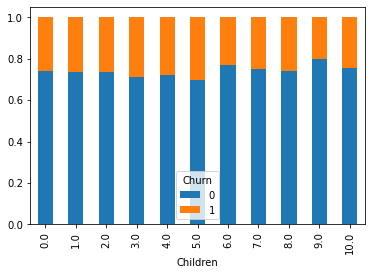

In [27]:
area_crosstab = pd.crosstab(df["Children"], df["Churn"], normalize='index')
area_crosstab.plot(kind='bar', stacked = True)
crosstab_norm = area_crosstab.div(area_crosstab.sum(1), axis=0)

There is some variability in number of children so we will keep this column.

Let's Look at Age next.

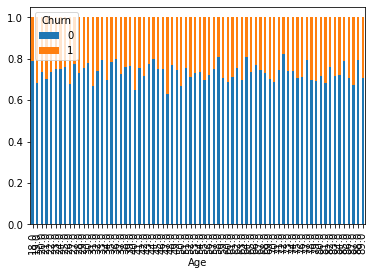

In [28]:
area_crosstab = pd.crosstab(df["Age"], df["Churn"], normalize='index')
area_crosstab.plot(kind='bar', stacked = True)
crosstab_norm = area_crosstab.div(area_crosstab.sum(1), axis=0)

Looks like we need to group ages into ranges as well. Let's do that now.

Age Group 4 = 18-34 - Millennial
Age Group 3 = 35-50 - Gen X
Age Group 2 = 51-69 - Boomer
Age Group 1 = 70-87 - Silent

In general in marketing the younger groups hold more weight so I put their value as 4. 

Resource: https://www.weforum.org/agenda/2015/09/how-different-age-groups-identify-with-their-generational-labels/

In [29]:
# Groups 1 to 4
df['Age_Numeric'] = df["Age"].where(df["Age"] >= 34, 4)
df["Age_Numeric"].where((df["Age_Numeric"] < 34) | (df["Age_Numeric"] >= 50), 3, inplace=True)
df["Age_Numeric"].where((df["Age_Numeric"] < 50) | (df["Age_Numeric"] >= 69), 2, inplace=True)
df["Age_Numeric"].where(df["Age_Numeric"] < 69, 3, inplace=True)
df.head(50)

,Zip,Population,Children,Age,Education,Income,Marital_Status,Gender,Churn,Outage_sec_perweek,Email_Count,Contacted_Count,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,index,Education_Numeric,Income_Numeric,Age_Numeric
0,99927,38,1.0,68.0,Master's Degree,28561.990,Widowed,Male,0,6.972566,10,0,1,0.0,One year,1,1,Fiber Optic,1.0,1,1,0,0.0,0,1,1,Credit Card (automatic),6.795513,171.449762,904.536110,0,18,1.0,2.0
1,48661,10446,1.0,27.0,Regular High School Diploma,21704.770,Married,Female,1,12.014541,12,0,1,1.0,Month-to-month,0,1,Fiber Optic,1.0,1,0,0,0.0,1,1,1,Bank Transfer(automatic),1.156681,242.948015,800.982766,1,12,1.0,4.0
2,97148,3735,4.0,50.0,Regular High School Diploma,33186.785,Widowed,Female,0,10.245616,9,0,1,1.0,Two Year,1,0,DSL,1.0,0,0,0,0.0,0,1,1,Credit Card (automatic),15.754144,159.440398,2054.706961,2,12,1.0,2.0
3,92014,13863,1.0,48.0,Doctorate Degree,18925.230,Married,Male,0,15.206193,15,2,0,1.0,Two Year,0,0,DSL,1.0,1,0,0,0.0,1,0,1,Mailed Check,17.087227,120.249493,2164.579412,3,26,1.0,3.0
4,77461,11352,0.0,83.0,Master's Degree,40074.190,Separated,Male,1,8.960316,16,2,1,0.0,Month-to-month,1,0,Fiber Optic,0.0,0,0,0,1.0,1,0,0,Mailed Check,1.670972,150.761216,271.493436,4,18,1.0,3.0
5,31030,17701,3.0,83.0,No Schooling Completed,33186.785,Never Married,Female,0,7.814859,15,3,1,0.0,One year,1,0,None,1.0,1,1,1,0.0,0,1,0,Electronic Check,7.000994,184.401558,1039.357983,5,0,1.0,3.0
6,37847,2535,0.0,53.0,Associate's Degree,11467.500,Widowed,Male,1,11.129094,10,0,1,1.0,Month-to-month,0,0,DSL,1.0,0,0,0,1.0,1,1,0,Electronic Check,13.236774,200.064886,1907.242972,6,14,1.0,2.0
7,73109,23144,2.0,53.0,Bachelor's Degree,26759.640,Married,Female,1,7.594838,16,0,0,1.0,Month-to-month,0,0,DSL,0.0,0,1,0,0.0,0,0,1,Mailed Check,36.196030,114.754111,979.612708,7,16,1.0,2.0
8,34771,17351,2.0,49.0,"Some College, Less than 1 Year",58634.510,Separated,Prefer not to answer,0,6.637259,20,2,3,0.0,Month-to-month,1,0,DSL,1.0,1,1,0,0.0,0,0,1,Bank Transfer(automatic),8.220686,118.366844,1312.874964,8,12,2.0,3.0
9,45237,20193,1.0,86.0,GED or Alternative Credential,50231.400,Married,Female,0,9.230409,18,1,0,0.0,Two Year,1,0,Fiber Optic,1.0,1,0,1,1.0,0,1,1,Mailed Check,3.422086,163.005280,508.763791,9,12,2.0,3.0


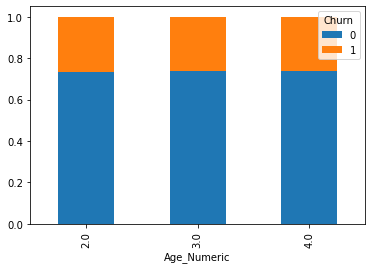

In [30]:
area_crosstab = pd.crosstab(df["Age_Numeric"], df["Churn"], normalize='index')
area_crosstab.plot(kind='bar', stacked = True)
crosstab_norm = area_crosstab.div(area_crosstab.sum(1), axis=0)

We will keep Age_Numeric as it looks like group 2 churns at a higher rate than the rest. The Age_Numeric field was just for the purpose of looking if we should keep the Age field or not. We will.

Let's look at Marital Status's bar chart next to see if it affect churn.

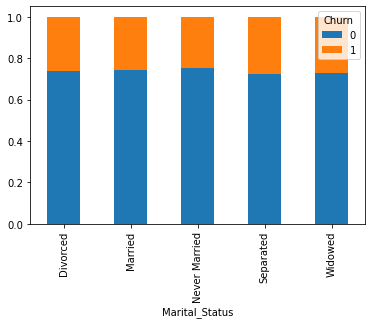

In [31]:
area_crosstab = pd.crosstab(df["Marital_Status"], df["Churn"], normalize='index')
area_crosstab.plot(kind='bar', stacked = True)
crosstab_norm = area_crosstab.div(area_crosstab.sum(1), axis=0)

It does not look like there is enough variance here to keep this field for testing. Let's drop this field.

In [32]:
df = df.drop(columns=['Marital_Status'])
df.head(1)

,Zip,Population,Children,Age,Education,Income,Gender,Churn,Outage_sec_perweek,Email_Count,Contacted_Count,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,index,Education_Numeric,Income_Numeric,Age_Numeric
0,99927,38,1.0,68.0,Master's Degree,28561.99,Male,0,6.972566,10,0,1,0.0,One year,1,1,Fiber Optic,1.0,1,1,0,0.0,0,1,1,Credit Card (automatic),6.795513,171.449762,904.53611,0,18,1.0,2.0


Let's Look at Gender next.

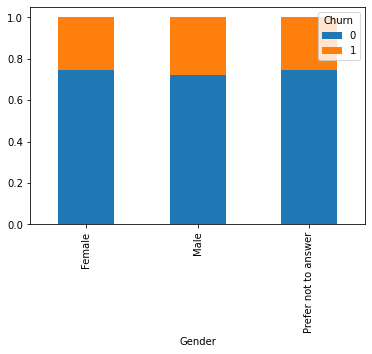

In [33]:
area_crosstab = pd.crosstab(df["Gender"], df["Churn"], normalize='index')
area_crosstab.plot(kind='bar', stacked = True)
crosstab_norm = area_crosstab.div(area_crosstab.sum(1), axis=0)

It does not look like there is enough variance in Gender to keep this field for testing. Let's drop this field.

In [34]:
df = df.drop(columns=['Gender'])
df.head(1)

,Zip,Population,Children,Age,Education,Income,Churn,Outage_sec_perweek,Email_Count,Contacted_Count,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,index,Education_Numeric,Income_Numeric,Age_Numeric
0,99927,38,1.0,68.0,Master's Degree,28561.99,0,6.972566,10,0,1,0.0,One year,1,1,Fiber Optic,1.0,1,1,0,0.0,0,1,1,Credit Card (automatic),6.795513,171.449762,904.53611,0,18,1.0,2.0


Let's look at Contract next.

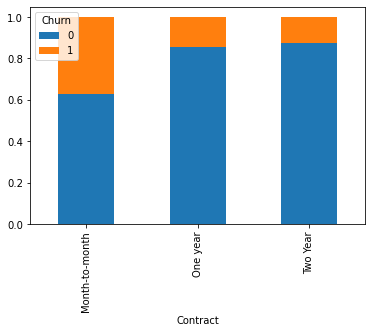

In [35]:
area_crosstab = pd.crosstab(df["Contract"], df["Churn"], normalize='index')
area_crosstab.plot(kind='bar', stacked = True)
crosstab_norm = area_crosstab.div(area_crosstab.sum(1), axis=0)

There is definitely a churn difference in month-to-month. Let's add a numeric value to this field.

Month To Month would hold the least weight at 0, One Year next at 1, and Two Year next at 2

In [36]:
dict_contract = {"Contract_Numeric": {"Month-to-month": 0, "One year": 1, "Two Year": 2}}
df["Contract_Numeric"] = df["Contract"]
df.replace(dict_contract, inplace=True)
df.head(100)

,Zip,Population,Children,Age,Education,Income,Churn,Outage_sec_perweek,Email_Count,Contacted_Count,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,index,Education_Numeric,Income_Numeric,Age_Numeric,Contract_Numeric
0,99927,38,1.0,68.0,Master's Degree,28561.990,0,6.972566,10,0,1,0.0,One year,1,1,Fiber Optic,1.0,1,1,0,0.0,0,1,1,Credit Card (automatic),6.795513,171.449762,904.536110,0,18,1.0,2.0,1
1,48661,10446,1.0,27.0,Regular High School Diploma,21704.770,1,12.014541,12,0,1,1.0,Month-to-month,0,1,Fiber Optic,1.0,1,0,0,0.0,1,1,1,Bank Transfer(automatic),1.156681,242.948015,800.982766,1,12,1.0,4.0,0
2,97148,3735,4.0,50.0,Regular High School Diploma,33186.785,0,10.245616,9,0,1,1.0,Two Year,1,0,DSL,1.0,0,0,0,0.0,0,1,1,Credit Card (automatic),15.754144,159.440398,2054.706961,2,12,1.0,2.0,2
3,92014,13863,1.0,48.0,Doctorate Degree,18925.230,0,15.206193,15,2,0,1.0,Two Year,0,0,DSL,1.0,1,0,0,0.0,1,0,1,Mailed Check,17.087227,120.249493,2164.579412,3,26,1.0,3.0,2
4,77461,11352,0.0,83.0,Master's Degree,40074.190,1,8.960316,16,2,1,0.0,Month-to-month,1,0,Fiber Optic,0.0,0,0,0,1.0,1,0,0,Mailed Check,1.670972,150.761216,271.493436,4,18,1.0,3.0,0
5,31030,17701,3.0,83.0,No Schooling Completed,33186.785,0,7.814859,15,3,1,0.0,One year,1,0,None,1.0,1,1,1,0.0,0,1,0,Electronic Check,7.000994,184.401558,1039.357983,5,0,1.0,3.0,1
6,37847,2535,0.0,53.0,Associate's Degree,11467.500,1,11.129094,10,0,1,1.0,Month-to-month,0,0,DSL,1.0,0,0,0,1.0,1,1,0,Electronic Check,13.236774,200.064886,1907.242972,6,14,1.0,2.0,0
7,73109,23144,2.0,53.0,Bachelor's Degree,26759.640,1,7.594838,16,0,0,1.0,Month-to-month,0,0,DSL,0.0,0,1,0,0.0,0,0,1,Mailed Check,36.196030,114.754111,979.612708,7,16,1.0,2.0,0
8,34771,17351,2.0,49.0,"Some College, Less than 1 Year",58634.510,0,6.637259,20,2,3,0.0,Month-to-month,1,0,DSL,1.0,1,1,0,0.0,0,0,1,Bank Transfer(automatic),8.220686,118.366844,1312.874964,8,12,2.0,3.0,0
9,45237,20193,1.0,86.0,GED or Alternative Credential,50231.400,0,9.230409,18,1,0,0.0,Two Year,1,0,Fiber Optic,1.0,1,0,1,1.0,0,1,1,Mailed Check,3.422086,163.005280,508.763791,9,12,2.0,3.0,2


Next up is InternetService. Let's take a look at the bar chart. 


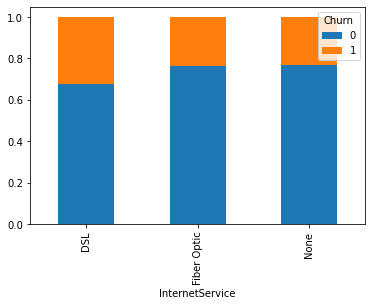

In [37]:
area_crosstab = pd.crosstab(df["InternetService"], df["Churn"], normalize='index')
area_crosstab.plot(kind='bar', stacked = True)
crosstab_norm = area_crosstab.div(area_crosstab.sum(1), axis=0)

There is definitely a churn difference in DSL. Let's add a numeric value to this field.

None would hold the least weight at 0, DSL next at 1, and Fiber Optic next at 2. Values are weighted based on assumptions about the pricing model.

In [38]:
dict_contract = {"InternetService_Numeric": {"None": 0, "DSL": 1, "Fiber Optic": 2}}
df["InternetService_Numeric"] = df["InternetService"]
df.replace(dict_contract, inplace=True)
df.head(100)

,Zip,Population,Children,Age,Education,Income,Churn,Outage_sec_perweek,Email_Count,Contacted_Count,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,index,Education_Numeric,Income_Numeric,Age_Numeric,Contract_Numeric,InternetService_Numeric
0,99927,38,1.0,68.0,Master's Degree,28561.990,0,6.972566,10,0,1,0.0,One year,1,1,Fiber Optic,1.0,1,1,0,0.0,0,1,1,Credit Card (automatic),6.795513,171.449762,904.536110,0,18,1.0,2.0,1,2
1,48661,10446,1.0,27.0,Regular High School Diploma,21704.770,1,12.014541,12,0,1,1.0,Month-to-month,0,1,Fiber Optic,1.0,1,0,0,0.0,1,1,1,Bank Transfer(automatic),1.156681,242.948015,800.982766,1,12,1.0,4.0,0,2
2,97148,3735,4.0,50.0,Regular High School Diploma,33186.785,0,10.245616,9,0,1,1.0,Two Year,1,0,DSL,1.0,0,0,0,0.0,0,1,1,Credit Card (automatic),15.754144,159.440398,2054.706961,2,12,1.0,2.0,2,1
3,92014,13863,1.0,48.0,Doctorate Degree,18925.230,0,15.206193,15,2,0,1.0,Two Year,0,0,DSL,1.0,1,0,0,0.0,1,0,1,Mailed Check,17.087227,120.249493,2164.579412,3,26,1.0,3.0,2,1
4,77461,11352,0.0,83.0,Master's Degree,40074.190,1,8.960316,16,2,1,0.0,Month-to-month,1,0,Fiber Optic,0.0,0,0,0,1.0,1,0,0,Mailed Check,1.670972,150.761216,271.493436,4,18,1.0,3.0,0,2
5,31030,17701,3.0,83.0,No Schooling Completed,33186.785,0,7.814859,15,3,1,0.0,One year,1,0,None,1.0,1,1,1,0.0,0,1,0,Electronic Check,7.000994,184.401558,1039.357983,5,0,1.0,3.0,1,0
6,37847,2535,0.0,53.0,Associate's Degree,11467.500,1,11.129094,10,0,1,1.0,Month-to-month,0,0,DSL,1.0,0,0,0,1.0,1,1,0,Electronic Check,13.236774,200.064886,1907.242972,6,14,1.0,2.0,0,1
7,73109,23144,2.0,53.0,Bachelor's Degree,26759.640,1,7.594838,16,0,0,1.0,Month-to-month,0,0,DSL,0.0,0,1,0,0.0,0,0,1,Mailed Check,36.196030,114.754111,979.612708,7,16,1.0,2.0,0,1
8,34771,17351,2.0,49.0,"Some College, Less than 1 Year",58634.510,0,6.637259,20,2,3,0.0,Month-to-month,1,0,DSL,1.0,1,1,0,0.0,0,0,1,Bank Transfer(automatic),8.220686,118.366844,1312.874964,8,12,2.0,3.0,0,1
9,45237,20193,1.0,86.0,GED or Alternative Credential,50231.400,0,9.230409,18,1,0,0.0,Two Year,1,0,Fiber Optic,1.0,1,0,1,1.0,0,1,1,Mailed Check,3.422086,163.005280,508.763791,9,12,2.0,3.0,2,2


Next let's look at the PaymentMethod field.

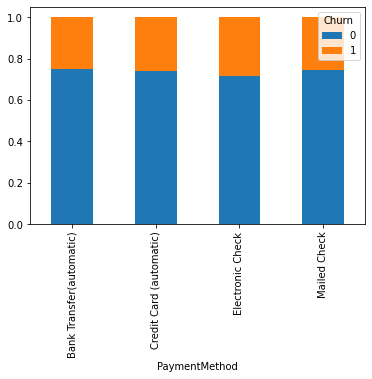

In [39]:
area_crosstab = pd.crosstab(df["PaymentMethod"], df["Churn"], normalize='index')
area_crosstab.plot(kind='bar', stacked = True)
crosstab_norm = area_crosstab.div(area_crosstab.sum(1), axis=0)

There is not enough variance in PaymentMethods to justify keeping this field. Let's drop it.

In [40]:
df = df.drop(columns=['PaymentMethod'])
df.head(1)

,Zip,Population,Children,Age,Education,Income,Churn,Outage_sec_perweek,Email_Count,Contacted_Count,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,Tenure,MonthlyCharge,Bandwidth_GB_Year,index,Education_Numeric,Income_Numeric,Age_Numeric,Contract_Numeric,InternetService_Numeric
0,99927,38,1.0,68.0,Master's Degree,28561.99,0,6.972566,10,0,1,0.0,One year,1,1,Fiber Optic,1.0,1,1,0,0.0,0,1,1,6.795513,171.449762,904.53611,0,18,1.0,2.0,1,2


The data is now cleaner! Fields that cannot be justified to keep due to little variance between values have been dropped. The field values that were not numeric and kept because of their influence on churn were reexpressed numerically in new fields. 

### E. Standardize the numeric fields

In [41]:
from scipy import stats
# Standardize fields that are not boolean (0,1) with z scores
# df['Zip_z'] = stats.zscore(df['Zip'])
df['Population_z'] = stats.zscore(df['Population'])
df['Age_z'] = stats.zscore(df['Age'])
df['Education_Numeric_z'] = stats.zscore(df['Education_Numeric'])
df['Income_z'] = stats.zscore(df['Income'])
df['Outage_sec_perweek_z'] = stats.zscore(df['Outage_sec_perweek'])
df['Age_z'] = stats.zscore(df['Age'])
df['Yearly_equip_failure_z'] = stats.zscore(df['Yearly_equip_failure'])
df['Tenure_z'] = stats.zscore(df['Tenure'])
df['MonthlyCharge_z'] = stats.zscore(df['MonthlyCharge'])
df['Bandwidth_GB_Year_z'] = stats.zscore(df['Bandwidth_GB_Year'])
df['Education_Numeric_z'] = stats.zscore(df['Education_Numeric'])
df['Contract_Numeric_z'] = stats.zscore(df['Contract_Numeric'])
df['InternetService_Numeric_z'] = stats.zscore(df['InternetService_Numeric'])

### F. Identify Outliers
Outliers are extreme values in the records. The rule of thumb is used for outliers that if the z-value is greater than 3 or less than -3. These outliers will serve the purpose of shedding more light on the data and will not be removed. Let's query for outliers and create data sets for them now.

### D.1 Describe the findings, including all anomalies, from the implementation of the data-cleaning plan from part C.

### D.2 Justify your methods for mitigating each type of discovered anomaly in the data set.
These outliers will serve the purpose of shedding more light on the data and will not be removed. This is due to best practices. Best practices would be to take the outliers to the stakeholder and getting feedback on how they would want to handle these anomalies. 

In [42]:
Population_outliers = df.query('Population_z > 3 | Population_z < -3')
Age_outliers = df.query('Age > 3 | Age < -3')
Education_outliers = df.query('Education_Numeric_z > 3 | Education_Numeric_z < -3')
Income_outliers = df.query('Income_z > 3 | Income_z < -3')
Outage_sec_perweek_outliers = df.query('Outage_sec_perweek_z > 3 | Outage_sec_perweek_z < -3')
Yearly_equip_failure_outliers = df.query('Yearly_equip_failure_z > 3 | Yearly_equip_failure_z < -3')
Tenure_outliers = df.query('Tenure_z > 3 | Tenure_z < -3')
MonthlyCharge_outliers = df.query('MonthlyCharge_z > 3 | MonthlyCharge_z < -3')
Bandwidth_GB_Year_outliers = df.query('Bandwidth_GB_Year_z > 3 | Bandwidth_GB_Year_z < -3')
Contract_Numeric_outliers = df.query('Contract_Numeric_z > 3 | Contract_Numeric_z < -3')
InternetService_Numeric_outliers = df.query('InternetService_Numeric_z > 3 | InternetService_Numeric_z < -3')

In [43]:
print("Number of Population Outliers:", Population_outliers.shape[0])
print("Number of Age Outliers:", Age_outliers.shape[0])
print("Number of Education Outliers:", Education_outliers.shape[0])
print("Number of Age Outliers:", Income_outliers.shape[0])
print("Number of Outage Seconds Per Week Outliers:", Outage_sec_perweek_outliers.shape[0])
print("Number of Equip Failures Outliers:", Yearly_equip_failure_outliers.shape[0])
print("Number of Tenure Outliers:", Tenure_outliers.shape[0])
print("Number of Monthly Charge Outliers:", MonthlyCharge_outliers.shape[0])
print("Number of Bandwidth GB Year Outliers:", Bandwidth_GB_Year_outliers.shape[0])
print("Number of Contract Outliers:", Contract_Numeric_outliers.shape[0])
print("Number of Internet Service Outliers:", InternetService_Numeric_outliers.shape[0])

Number of Population Outliers: 219
Number of Age Outliers: 10000
Number of Education Outliers: 234
Number of Age Outliers: 193
Number of Outage Seconds Per Week Outliers: 491
Number of Equip Failures Outliers: 94
Number of Tenure Outliers: 0
Number of Monthly Charge Outliers: 3
Number of Bandwidth GB Year Outliers: 0
Number of Contract Outliers: 0
Number of Internet Service Outliers: 0


# Part III: Data Cleaning



## D.  Summarize the data-cleaning process by doing the following:

1.  Describe the findings, including all anomalies, from the implementation of the data-cleaning plan from part C.
See the process and steps above.

2.  Justify your methods for mitigating each type of discovered anomaly in the data set.
(Repeated from above) These outliers will serve the purpose of shedding more light on the data and will not be removed. This is due to best practices. Best practices would be to take the outliers to the stakeholder and getting feedback on how they would want to handle these anomalies. 

3.  Summarize the outcome from the implementation of each data-cleaning step.
See the mark down cells following each data cleaning step in the process above. 

4.  Provide the code used to mitigate anomalies.
See above. 

5.  Provide a copy of the cleaned data set.

6.  Summarize the limitations of the data-cleaning process.
The limitations of the data-cleaning process are that I have no access to stakeholders to shed light on what some of the data means. For this reason, assumptions had to be made and some decisions were based on these assumptions.

7.  Discuss how the limitations in part D6 affect the analysis of the question or decision from part A.
 Having to make decisions based on assumptions could affect the outcome of the analysis because my assumptions could be misguided. 

## E.  Apply principal component analysis (PCA) to identify the significant features of the data set by doing the following:

1.  List the principal components in the data set.

2.  Describe how you identified the principal components of the data set.

3.  Describe how the organization can benefit from the results of the PCA

In [44]:
# Export cleaned dataframe
df_cleaned = df
df_cleaned.to_csv(r'C:/Users/verab/D206/df_cleaned.csv')

## Principle Component Analysis Phase

In [45]:
df_cleaned.head(5)

,Zip,Population,Children,Age,Education,Income,Churn,Outage_sec_perweek,Email_Count,Contacted_Count,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,Tenure,MonthlyCharge,Bandwidth_GB_Year,index,Education_Numeric,Income_Numeric,Age_Numeric,Contract_Numeric,InternetService_Numeric,Population_z,Age_z,Education_Numeric_z,Income_z,Outage_sec_perweek_z,Yearly_equip_failure_z,Tenure_z,MonthlyCharge_z,Bandwidth_GB_Year_z,Contract_Numeric_z,InternetService_Numeric_z
0,99927,38,1.0,68.0,Master's Degree,28561.990,0,6.972566,10,0,1,0.0,One year,1,1,Fiber Optic,1.0,1,1,0,0.0,0,1,1,6.795513,171.449762,904.536110,0,18,1.0,2.0,1,2,-0.673405,0.821689,1.533234,-0.391731,-0.637726,0.946658,-1.106419,-0.060613,-1.202650,0.360510,0.995317
1,48661,10446,1.0,27.0,Regular High School Diploma,21704.770,1,12.014541,12,0,1,1.0,Month-to-month,0,1,Fiber Optic,1.0,1,0,0,0.0,1,1,1,1.156681,242.948015,800.982766,1,12,1.0,4.0,0,2,0.047772,-1.455765,-0.331863,-0.668828,0.079935,0.946658,-1.330346,1.589348,-1.252613,-0.835609,0.995317
2,97148,3735,4.0,50.0,Regular High School Diploma,33186.785,0,10.245616,9,0,1,1.0,Two Year,1,0,DSL,1.0,0,0,0,0.0,0,1,1,15.754144,159.440398,2054.706961,2,12,1.0,2.0,2,1,-0.417238,-0.178169,-0.331863,-0.204845,-0.171849,0.946658,-0.750657,-0.337752,-0.647713,1.556629,-0.293787
3,92014,13863,1.0,48.0,Doctorate Degree,18925.230,0,15.206193,15,2,0,1.0,Two Year,0,0,DSL,1.0,1,0,0,0.0,1,0,1,17.087227,120.249493,2164.579412,3,26,1.0,3.0,2,1,0.284537,-0.289264,4.020030,-0.781148,0.534225,-0.625864,-0.697719,-1.242158,-0.594701,1.556629,-0.293787
4,77461,11352,0.0,83.0,Master's Degree,40074.190,1,8.960316,16,2,1,0.0,Month-to-month,1,0,Fiber Optic,0.0,0,0,0,1.0,1,0,0,1.670972,150.761216,271.493436,4,18,1.0,3.0,0,2,0.110549,1.654904,1.533234,0.073471,-0.354795,0.946658,-1.309923,-0.538041,-1.508082,-0.835609,0.995317


In [46]:
# View the correlation chart
df.corr()

,Zip,Population,Children,Age,Income,Churn,Outage_sec_perweek,Email_Count,Contacted_Count,Yearly_equip_failure,Techie,Port_modem,Tablet,Phone,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,Tenure,MonthlyCharge,Bandwidth_GB_Year,index,Education_Numeric,Income_Numeric,Age_Numeric,Contract_Numeric,InternetService_Numeric,Population_z,Age_z,Education_Numeric_z,Income_z,Outage_sec_perweek_z,Yearly_equip_failure_z,Tenure_z,MonthlyCharge_z,Bandwidth_GB_Year_z,Contract_Numeric_z,InternetService_Numeric_z
Zip,1.000000,0.045138,-0.020663,-0.000622,0.001234,0.008199,0.002708,-0.007860,-0.004720,0.011047,-0.006927,0.013726,-0.010344,0.002949,-0.008295,-0.014154,-0.024445,0.011494,0.010713,-0.005273,0.002368,-0.004627,-0.007403,-0.002239,0.003007,-0.004310,0.005922,-0.005218,-0.011503,-0.020363,0.045138,-0.000622,-0.004310,0.001234,0.002708,0.011047,-0.004627,-0.007403,-0.002239,-0.011503,-0.020363
Population,0.045138,1.000000,-0.011772,-0.001644,-0.002558,-0.008533,-0.005205,0.017962,0.004019,-0.004483,-0.009921,0.008577,0.001225,0.003283,0.012549,0.010352,-0.003795,-0.005885,-0.006590,-0.005882,0.008656,0.000081,-0.005957,0.000524,-0.007494,0.009822,0.004937,0.007473,0.013686,0.002849,1.000000,-0.001644,0.009822,-0.002558,-0.005205,-0.004483,0.000081,-0.005957,0.000524,0.013686,0.002849
Children,-0.020663,-0.011772,1.000000,-0.019067,0.012895,0.002397,0.003086,-0.000456,-0.018455,0.013183,-0.006717,-0.007166,-0.001939,-0.003576,-0.000245,0.005303,0.014808,-0.002326,-0.001569,0.004048,0.004753,-0.013327,-0.003096,0.010368,-0.013537,0.002776,0.014989,0.019864,0.023912,-0.009671,-0.011772,-0.019067,0.002776,0.012895,0.003086,0.013183,-0.013327,-0.003096,0.010368,0.023912,-0.009671
Age,-0.000622,-0.001644,-0.019067,1.000000,0.000255,0.006131,-0.015654,0.002469,0.017343,0.006509,-0.014541,0.004357,-0.017368,0.003923,-0.022183,-0.006185,0.008204,0.027768,0.000303,0.009327,0.007376,0.005705,0.007011,-0.021585,0.006875,-0.001323,-0.008154,-0.440826,-0.007552,0.000123,-0.001644,1.000000,-0.001323,0.000255,-0.015654,0.006509,0.005705,0.007011,-0.021585,-0.007552,0.000123
Income,0.001234,-0.002558,0.012895,0.000255,1.000000,0.011542,0.005895,-0.012584,0.000654,-0.002563,0.009992,-0.002817,0.002104,-0.003529,-0.006193,-0.007984,0.004466,0.008071,-0.001050,-0.008660,-0.012751,0.004617,-0.005718,0.003149,-0.003319,-0.000813,0.828419,0.003260,-0.015746,-0.005449,-0.002558,0.000255,-0.000813,1.000000,0.005895,-0.002563,0.004617,-0.005718,0.003149,-0.015746,-0.005449
Churn,0.008199,-0.008533,0.002397,0.006131,0.011542,1.000000,-0.012813,0.012326,0.008567,-0.015927,0.064177,0.008157,-0.002779,-0.027529,-0.013540,0.050508,0.056489,0.021599,0.230151,0.289262,0.007030,-0.463695,0.367495,-0.418048,-0.409318,-0.000080,0.010934,-0.005533,-0.251047,-0.017507,-0.008533,0.006131,-0.000080,0.011542,-0.012813,-0.015927,-0.463695,0.367495,-0.418048,-0.251047,-0.017507
Outage_sec_perweek,0.002708,-0.005205,0.003086,-0.015654,0.005895,-0.012813,1.000000,0.009429,-0.001775,0.017083,-0.003894,0.002058,0.014790,-0.016984,-0.002900,0.006160,0.022107,-0.012733,0.001064,0.004338,0.007532,0.005629,0.130688,0.014295,0.013356,-0.005900,0.011957,-0.002391,0.009339,-0.009801,-0.005205,-0.015654,-0.005900,0.005895,1.000000,0.017083,0.005629,0.130688,0.014295,0.009339,-0.009801
Email_Count,-0.007860,0.017962,-0.000456,0.002469,-0.012584,0.012326,0.009429,1.000000,0.003040,-0.016354,-0.018255,0.014196,-0.008579,-0.004449,-0.024908,-0.011763,0.001520,0.014538,0.005099,0.000711,-0.012632,-0.010052,0.003227,-0.016993,-0.011274,0.006587,-0.007502,0.016976,-0.002403,0.002451,0.017962,0.002469,0.006587,-0.012584,0.009429,-0.016354,-0.010052,0.003227,-0.016993,-0.002403,0.002451
Contacted_Count,-0.004720,0.004019,-0.018455,0.017343,0.000654,0.008567,-0.001775,0.003040,1.000000,-0.006032,0.001004,-0.002219,-0.011855,0.001852,0.010922,0.010398,0.000497,-0.014011,0.000524,0.011002,-0.002649,0.001591,0.002890,0.004516,0.004361,-0.003682,0.0

In [47]:
# Select features that are strongly correlated with Churn - negatively or positively
df_pca = df[['StreamingTV', 'StreamingMovies', 'Tenure', 'MonthlyCharge_z', 'Bandwidth_GB_Year_z', 'Contract_Numeric_z', 'Churn' ]]

In [48]:
# Normalize the vaiables by dividing the mean by the standard deviation of each feature
df_pca_normalized=(df_pca - df_pca.mean())/df_pca.std()


In [49]:
# Create the PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=df_pca.shape[1])
pca.fit(df_pca_normalized)
df_pca2 = pd.DataFrame(pca.transform(df_pca_normalized),
columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7'])

To assess how much weightings each feature will have in later predictions, we could construct a loadings table. The loadings shows how much each of our original features have contributed to each of the “new features” — the principal components.

In [50]:
# PCA loadings - weights of the features in relation to PCs
loadings = pd.DataFrame(pca.components_.T,
                       columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7'],
                       index=df_pca_normalized.columns)
loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
StreamingTV,0.177704,0.368135,0.239045,-0.744405,-0.153697,-0.443876,-0.031106
StreamingMovies,0.238783,0.451725,-0.044852,0.632478,-0.163664,-0.556471,-0.021007
Tenure,-0.527034,0.370197,-0.150771,-0.021618,0.233354,0.020194,-0.712129
MonthlyCharge_z,0.299934,0.584204,0.125560,0.032794,-0.243369,0.701885,-0.005703
Bandwidth_GB_Year_z,-0.499200,0.414830,-0.139280,-0.035810,0.259498,-0.009700,0.700429
Contract_Numeric_z,-0.111808,-0.006188,0.913797,0.196037,0.337506,-0.002751,-0.009370
Churn,0.531016,0.099792,-0.218917,-0.067660,0.809110,0.012672,-0.027222


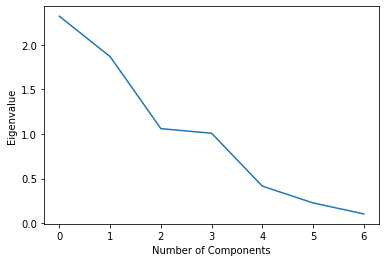

In [51]:
# Kaiser Rule retain PCs with eigenvalues (the strength of the transformation in the direction of eigenvector) greater than 1
# Create scree plots of eigenvalues to examine and determine which PCs should be retained
# Resource: https://wgu.webex.com/recordingservice/sites/wgu/recording/1bab06e9d1541039aabb00505681a06f/playback

# Extract eigenvalues
cov_matrix = np.dot(df_pca_normalized.T, df_pca_normalized) / df_pca.shape[0]
eigenvalues = [np.dot(eigenvector.T, np.dot(cov_matrix, eigenvector)) for eigenvector in pca.components_]

# Plot the eiganvalues
plt.plot(eigenvalues)
plt.xlabel('Number of Components')
plt.ylabel('Eigenvalue')
plt.show();

Based on the results of the plot PC1 and PC2 have an eiganvalue less than 1 and would be considered the Principle Components in the data set. And, based on the results of PC1 Tenure and Bandwidth_GB_Year are strongly correlated to PC1 and StreamingMovies, StreamingTV, Tenure, MonthlyCharge_z, Bandwidth_GB_Year_z are strongly correlated with PC2. 

It can therefore be inferred that these elements are important:
- The tenure of the customer
- The price customers pay for service
- The bandwidth customers receive
- Those who stream movies and TV

The list above would be the results that would be presented to stakeholders.

# Part IV: Supporting Documents
## F.  Provide a Panopto recording 
That demonstrates the warning- and error-free functionality of the code used to support the discovery of anomalies and the data cleaning process and summarizes the programming environment.
 

Bibliography
1. Larose, C. D., & Larose, D. T. (2019). Data science using Python and R. John Wiley & Sons. ISBN: 978-1-119-52684-1. 
2. http://invet-project.eu/wp-content/uploads/2014/06/National-Report_Portugal_Final.pdf
3.“How Different Age Groups Identify with Their Generational Labels | World Economic Forum.” World Economic Forum, https://www.weforum.org/agenda/2015/09/how-different-age-groups-identify-with-their-generational-labels/. Accessed 23 Aug. 2021.